# Free Response of a Single Degree of Freedom System

In [37]:
%matplotlib inline
%run vtoolbox

In this Notebook we investiage the impact of various parameters on the response of a single mass-damper-spring system. 

$$
m\ddot{x} +c\dot{x}+kx=0
$$

Here m, c, and k are the mass, damping, and stiffness in consistent units. 

## Computing the trajectories and plotting the result

Let's call the function once to view the solutions. For this set of parameters, we see the trajectories swirling around two points, called attractors. 

In [30]:
t, x, y = solve_sdofs(max_time = 30)

Using IPython's `interactive` function, we can explore how the trajectories behave as we change the various parameters.

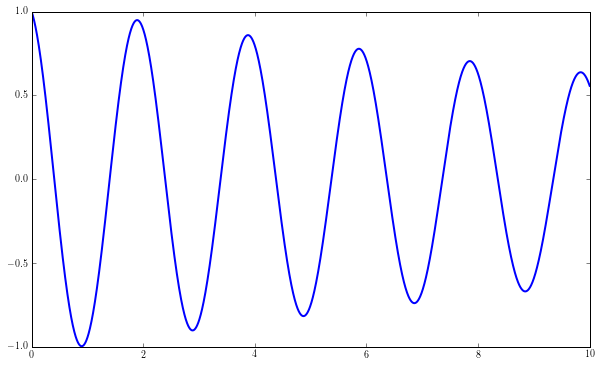

In [31]:
sdof_time_plot(m=10, c=1, k=100, x0=1, v0=-1, max_time=10)

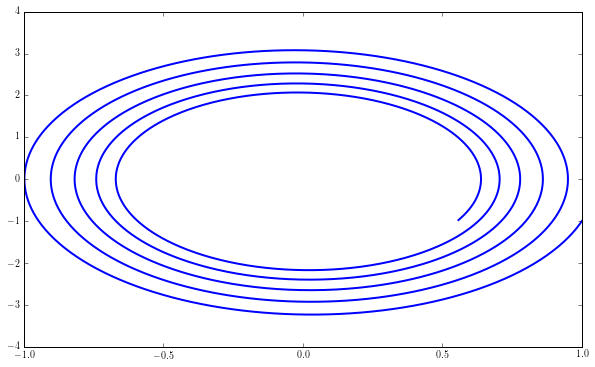

In [32]:
sdof_phase_plot(m=10, c=1, k=100, x0=1, v0=-1, max_time=10)

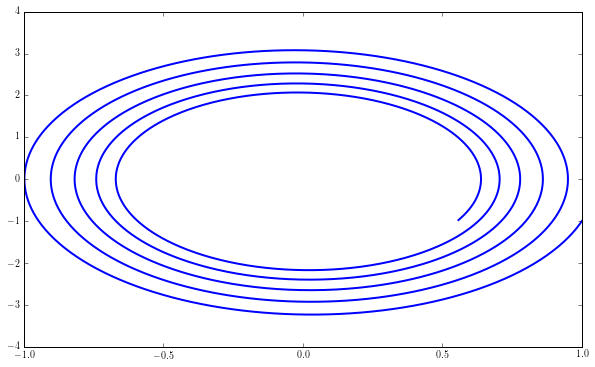

In [38]:
sdof_time_plot_i()

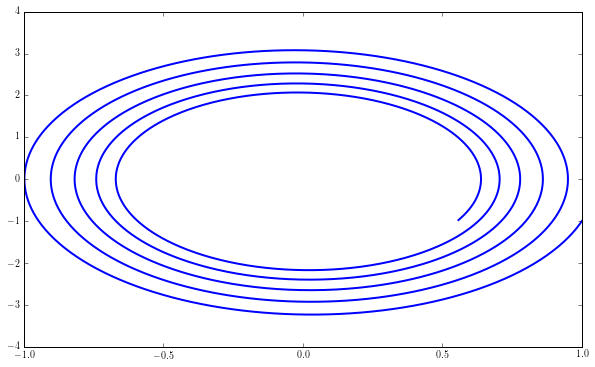

In [36]:
sdof_phase_plot_i()

After interacting with the system, we can take the result and perform further computations. In this case, we compute the average positions in $x$, $y$ and $z$.

In [41]:
xyz_avg = z_t.mean(axis=1)

In [42]:
xyz_avg.shape

(1, 2)

Creating histograms of the average positions (across different trajectories) show that on average the trajectories swirl about the attractors.

In [41]:
def vtb2_5(m=1,m0=.1,e=0.01,z=0.1,rmin=0.2,rmax=2):
    r=sp.arange(rmin,rmax,(rmax - rmin) / 1000)
    Xn=((r ** 4) / ((1 - r ** 2) ** 2 + (2 * z * r) ** 2))**0.5
    X=Xn * m0 * e / m
    phi=sp.arctan2(2 * z * r,1 - r ** 2)
    fig = plt.figure()
    fig.subplots_adjust(wspace = .4)
    plt.subplot(1,2,1)
    plt.plot(r,Xn,'-')
    plt.grid('on')
    plt.xlabel('Frequency Ratio')
    plt.ylabel('Normalized Displacement Magnitude')
    plt.title('Normalized Displacement Magnitude')

    plt.subplot(1,2,2)
    plt.plot(r,phi,'-')
    plt.grid('on')
    plt.xlabel('Frequency Ratio')
    plt.ylabel('Phase')
    plt.title('Phase')

    return

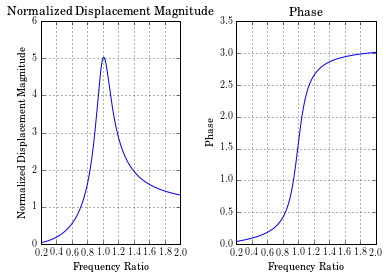

In [42]:
vtb2_5()


In [24]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Return a subplot axes positioned by the given grid definition.
    
    Typical call signature::
    
      subplot(nrows, ncols, plot_number)
    
    Where *nrows* and *ncols* are used to notionally split the figure
    into ``nrows * ncols`` sub-axes, and *plot_number* is used to identify
    the particular subplot that this function is to create within the notional
    grid. *plot_number* starts at 1, increments across rows first and has a
    maximum of ``nrows * ncols``.
    
    In the case when *nrows*, *ncols* and *plot_number* are all less than 10,
    a convenience exists, such that the a 3 digit number can be given instead,
    where the hundreds represent *nrows*, the tens represent *ncols* and the
    units represent *plot_number*. For instance::
    
      subplot(211)
    
    produces a subaxes in a figure which represents the top plot (i.e. the
    first) in a 2 row by 1 column notiona

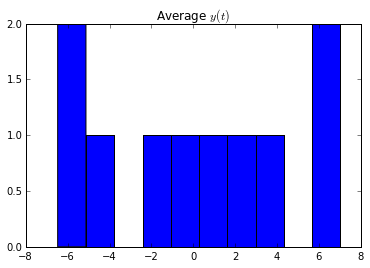

In [12]:
plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$')